In [1]:
import numpy as np
import scipy.special
import pandas as pd

In [2]:
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        print(self.wih)
        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)),
                                        numpy.transpose(hidden_outputs))
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),
                                        numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs


In [3]:
# x = []
# with open("mnist_train.csv", 'r') as f:
#     for i in range(25):
#         f.readline()
#         # в x будет 26 строка
#         x.insert(i, f.readline())
data = pd.read_csv("mnist_train.csv")
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


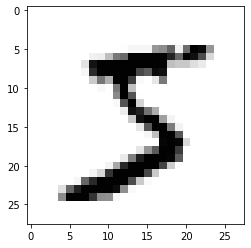

In [4]:
import numpy 
import matplotlib.pyplot 
%matplotlib inline
all_values_Y = data["label"]
all_values = data.drop("label", axis=1)
image_array = numpy.asfarray(all_values[:1]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')


In [5]:
# количество выходных узлов - 10 (пример) 
onodes = 10 
targets = numpy.zeros(onodes) + 0.01 
targets[int(all_values_Y[1])] =0.99
targets

array([0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [49]:

input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

epochs = 2

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

training_data_file = open('mnist_train.csv','r') 
training_data_list = training_data_file.readlines() 
training_data_file.close()

for e in range(epochs):
    for record in training_data_list[1:]:

        all_values = record.split(',')

        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01 
        targets[int(all_values[0])] =0.99
        n.train(inputs, targets)
        pass
    pass

[[ 0.00858848 -0.05688403  0.03571863 ... -0.06512335  0.00937578
   0.04790468]
 [ 0.02588224  0.035525   -0.05205044 ... -0.050927   -0.01785732
  -0.02571066]
 [ 0.01794163  0.01311472 -0.00653466 ... -0.02396145 -0.01379468
  -0.00306139]
 ...
 [ 0.03754307 -0.0591568   0.02410841 ... -0.01180175  0.00784726
   0.01629111]
 [-0.04363151  0.01244406 -0.01087841 ... -0.04545411  0.033685
  -0.00147083]
 [ 0.00111794 -0.01504856  0.03512661 ...  0.09019416 -0.05055063
   0.01255816]]


In [45]:
n.query((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[2.69246898e-02],
       [2.80172867e-03],
       [1.02877948e-02],
       [3.04633019e-03],
       [6.68187652e-04],
       [8.50456085e-03],
       [1.76302443e-03],
       [8.72958041e-04],
       [9.84860911e-01],
       [7.76363353e-02]])

In [46]:
test_data_file = open('mnist_test.csv','r') 
test_data_list = test_data_file.readlines() 
test_data_file.close()


In [48]:

scorecard = []
# перебрать все записи в тестовом наборе данных
for record in test_data_list[1:]:
    # получить список значений из записи, используя символы
    # запятой (*,1) в качестве разделителей
    all_values = record.split(',')
    # правильный ответ - первое значение
    correct_label = int(all_values[0])
    print(correct_label, "истинный маркер")
    # масштабировать и сместить входные значения
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # опрос сети
    outputs = n.query(inputs)
    # индекс наибольшего значения является маркерным значением
    label = numpy.argmax(outputs)
    print(label, "ответ сети")
    # присоединить оценку ответа сети к концу списка
    if (label == correct_label) :
        # в случае правильного ответа сети присоединить
        # к списку значение 1
        scorecard.append(1)
    else:
        # в случае неправильного ответа сети присоединить
        # к списку значение 0
        scorecard.append(0)
    pass
pass

7 истинный маркер
7 ответ сети
2 истинный маркер
2 ответ сети
1 истинный маркер
1 ответ сети
0 истинный маркер
0 ответ сети
4 истинный маркер
4 ответ сети
1 истинный маркер
1 ответ сети
4 истинный маркер
4 ответ сети
9 истинный маркер
9 ответ сети
5 истинный маркер
5 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
6 истинный маркер
6 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
5 истинный маркер
5 ответ сети
9 истинный маркер
9 ответ сети
7 истинный маркер
7 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
6 истинный маркер
6 ответ сети
5 истинный маркер
5 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
7 истинный маркер
7 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
3 истинный маркер
3 ответ сети
1 истинный маркер
1 ответ сети
3 истинн

8 ответ сети
2 истинный маркер
2 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
9 истинный маркер
9 ответ сети
7 истинный маркер
7 ответ сети
5 истинный маркер
5 ответ сети
9 истинный маркер
9 ответ сети
2 истинный маркер
2 ответ сети
6 истинный маркер
6 ответ сети
4 истинный маркер
4 ответ сети
1 истинный маркер
1 ответ сети
5 истинный маркер
5 ответ сети
8 истинный маркер
8 ответ сети
2 истинный маркер
2 ответ сети
9 истинный маркер
9 ответ сети
2 истинный маркер
2 ответ сети
0 истинный маркер
0 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
0 истинный маркер
0 ответ сети
2 истинный маркер
2 ответ сети
8 истинный маркер
8 ответ сети
4 истинный маркер
4 ответ сети
7 истинный маркер
7 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
2 истинный маркер
2 ответ сети
7 истинный маркер
7 ответ сети
4 истинный маркер
4 ответ сети
3 истинный маркер
3 ответ 

0 ответ сети
9 истинный маркер
9 ответ сети
8 истинный маркер
8 ответ сети
0 истинный маркер
0 ответ сети
4 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ сети
6 истинный маркер
6 ответ сети
3 истинный маркер
3 ответ сети
5 истинный маркер
5 ответ сети
4 истинный маркер
9 ответ сети
8 истинный маркер
8 ответ сети
3 истинный маркер
3 ответ сети
3 истинный маркер
3 ответ сети
9 истинный маркер
9 ответ сети
3 истинный маркер
3 ответ сети
3 истинный маркер
3 ответ сети
3 истинный маркер
8 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
0 истинный маркер
0 ответ сети
8 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
7 ответ сети
0 истинный маркер
0 ответ сети
6 истинный маркер
6 ответ сети
5 истинный маркер
5 ответ сети
4 истинный маркер
4 ответ сети
3 истинный маркер
3 ответ сети
8 истинный маркер
3 ответ сети
0 истинный маркер
0 ответ сети
9 истинный маркер
9 ответ 

2 истинный маркер
2 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
7 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
1 истинный маркер
1 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
4 истинный маркер
4 ответ сети
8 истинный маркер
8 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
7 ответ сети
7 истинный маркер
7 ответ сети
4 истинный маркер
4 ответ сети
8 истинный маркер
7 ответ сети
0 истинный маркер
0 ответ сети
7 истинный маркер
9 ответ сети
3 истинный маркер
3 ответ сети
1 истинный маркер
1 ответ сети
3 истинный маркер
3 ответ сети
1 истинный маркер
1 ответ сети
0 истинный маркер
0 ответ сети
7 истинный маркер
7 ответ сети
7 истинный маркер
7 ответ сети
0 истинный маркер
0 ответ сети
3 истинный маркер
3 ответ сети
5 истинный маркер
5 ответ сети
5 истинный маркер
5 ответ сети
2 истинный маркер
2 ответ сети
7 истинный маркер
7 ответ сети
6 истинный маркер
6 ответ сети
6 истинный маркер
6 ответ сети
9 истинн

7 ответ сети
4 истинный маркер
4 ответ сети
4 истинный маркер
6 ответ сети
5 истинный маркер
5 ответ сети
3 истинный маркер
8 ответ сети
5 истинный маркер
5 ответ сети
4 истинный маркер
4 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
0 истинный маркер
0 ответ сети
7 истинный маркер
7 ответ сети
6 истинный маркер
6 ответ сети
8 истинный маркер
8 ответ сети
8 истинный маркер
8 ответ сети
7 истинный маркер
7 ответ сети
3 истинный маркер
3 ответ сети
3 истинный маркер
3 ответ сети
1 истинный маркер
1 ответ сети
9 истинный маркер
9 ответ сети
5 истинный маркер
5 ответ сети
2 истинный маркер
2 ответ сети
7 истинный маркер
7 ответ сети
3 истинный маркер
3 ответ сети
5 истинный маркер
5 ответ сети
1 истинный маркер
1 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
1 истинный маркер
1 ответ сети
4 истинный маркер
4 ответ сети
7 истинный маркер
7 ответ сети
4 истинный маркер
4 ответ 

2 ответ сети
8 истинный маркер
1 ответ сети
1 истинный маркер
1 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
9 истинный маркер
9 ответ сети
4 истинный маркер
9 ответ сети
8 истинный маркер
8 ответ сети
3 истинный маркер
3 ответ сети
8 истинный маркер
8 ответ сети
6 истинный маркер
7 ответ сети
0 истинный маркер
0 ответ сети
2 истинный маркер
2 ответ сети
5 истинный маркер
5 ответ сети
1 истинный маркер
1 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
2 истинный маркер
2 ответ сети
9 истинный маркер
9 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ сети
6 истинный маркер
6 ответ сети
2 истинный маркер
2 ответ сети
5 истинный маркер
5 ответ сети
4 истинный маркер
4 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
8 истинный маркер
3 ответ 

7 ответ сети
3 истинный маркер
3 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
9 истинный маркер
9 ответ сети
3 истинный маркер
3 ответ сети
5 истинный маркер
5 ответ сети
0 истинный маркер
0 ответ сети
2 истинный маркер
2 ответ сети
7 истинный маркер
7 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
3 ответ сети
5 истинный маркер
5 ответ сети
8 истинный маркер
8 ответ сети
0 истинный маркер
0 ответ сети
8 истинный маркер
8 ответ сети
8 истинный маркер
8 ответ сети
1 истинный маркер
1 ответ сети
5 истинный маркер
5 ответ сети
0 истинный маркер
0 ответ сети
3 истинный маркер
3 ответ сети
0 истинный маркер
0 ответ сети
3 истинный маркер
3 ответ сети
1 истинный маркер
1 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
3 истинный маркер
3 ответ сети
7 истинный маркер
7 ответ сети
2 истинный маркер
2 ответ сети
7 истинный маркер
7 ответ сети
1 истинный маркер
1 ответ 

2 ответ сети
5 истинный маркер
5 ответ сети
5 истинный маркер
5 ответ сети
7 истинный маркер
7 ответ сети
6 истинный маркер
6 ответ сети
4 истинный маркер
4 ответ сети
6 истинный маркер
0 ответ сети
8 истинный маркер
8 ответ сети
4 истинный маркер
4 ответ сети
8 истинный маркер
8 ответ сети
2 истинный маркер
2 ответ сети
7 истинный маркер
7 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
2 истинный маркер
2 ответ сети
0 истинный маркер
0 ответ сети
3 истинный маркер
3 ответ сети
9 истинный маркер
9 ответ сети
4 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
2 истинный маркер
2 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
1 ответ сети
1 истинный маркер
1 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
3 ответ сети
3 истинный маркер
3 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
7 истинный маркер
7 ответ сети
6 истинный маркер
6 ответ 

0 ответ сети
3 истинный маркер
3 ответ сети
8 истинный маркер
8 ответ сети
5 истинный маркер
5 ответ сети
3 истинный маркер
3 ответ сети
6 истинный маркер
5 ответ сети
0 истинный маркер
0 ответ сети
9 истинный маркер
9 ответ сети
4 истинный маркер
4 ответ сети
6 истинный маркер
6 ответ сети
2 истинный маркер
2 ответ сети
5 истинный маркер
5 ответ сети
0 истинный маркер
0 ответ сети
2 истинный маркер
8 ответ сети
7 истинный маркер
7 ответ сети
4 истинный маркер
4 ответ сети
6 истинный маркер
6 ответ сети
6 истинный маркер
6 ответ сети
8 истинный маркер
8 ответ сети
6 истинный маркер
6 ответ сети
6 истинный маркер
6 ответ сети
8 истинный маркер
8 ответ сети
6 истинный маркер
6 ответ сети
9 истинный маркер
9 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
7 ответ сети
2 истинный маркер
2 ответ сети
5 истинный маркер
5 ответ сети
9 истинный маркер
9 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
7 истинный маркер
7 ответ сети
2 истинный маркер
2 ответ 

8 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
2 истинный маркер
2 ответ сети
7 истинный маркер
4 ответ сети
3 истинный маркер
3 ответ сети
6 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
9 истинный маркер
9 ответ сети
7 истинный маркер
7 ответ сети
6 истинный маркер
6 ответ сети
6 истинный маркер
6 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
2 истинный маркер
2 ответ сети
9 истинный маркер
9 ответ сети
5 истинный маркер
5 ответ сети
8 истинный маркер
8 ответ сети
3 истинный маркер
3 ответ сети
1 истинный маркер
1 ответ сети
0 истинный маркер
0 ответ сети
0 истинный маркер
0 ответ сети
7 истинный маркер
7 ответ сети
6 истинный маркер
6 ответ сети
6 истинный маркер
6 ответ сети
2 истинный маркер
2 ответ сети
1 истинный маркер
1 ответ сети
6 истинный маркер
6 ответ сети
9 истинный маркер
9 ответ сети
3 истинный маркер
3 ответ 

4 ответ сети
6 истинный маркер
6 ответ сети
8 истинный маркер
8 ответ сети
4 истинный маркер
4 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
8 истинный маркер
8 ответ сети
1 истинный маркер
3 ответ сети
3 истинный маркер
3 ответ сети
9 истинный маркер
9 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
3 истинный маркер
3 ответ сети
7 истинный маркер
7 ответ сети
3 истинный маркер
3 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
3 истинный маркер
3 ответ сети
7 истинный маркер
7 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
6 истинный маркер
6 ответ сети
2 истинный маркер
2 ответ сети
0 истинный маркер
0 ответ сети
8 истинный маркер
8 ответ сети
1 истинный маркер
1 ответ сети
5 истинный маркер
5 ответ сети
3 истинный маркер
3 ответ сети
5 истинный маркер
5 ответ сети
4 истинный маркер
4 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
7 ответ 

6 ответ сети
6 истинный маркер
6 ответ сети
2 истинный маркер
2 ответ сети
9 истинный маркер
9 ответ сети
1 истинный маркер
1 ответ сети
9 истинный маркер
9 ответ сети
4 истинный маркер
4 ответ сети
8 истинный маркер
8 ответ сети
3 истинный маркер
3 ответ сети
6 истинный маркер
6 ответ сети
9 истинный маркер
9 ответ сети
5 истинный маркер
5 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
2 истинный маркер
2 ответ сети
4 истинный маркер
4 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
7 истинный маркер
7 ответ сети
0 истинный маркер
0 ответ сети
6 истинный маркер
6 ответ сети
6 истинный маркер
6 ответ сети
9 истинный маркер
9 ответ сети
4 истинный маркер
9 ответ сети
8 истинный маркер
8 ответ сети
3 истинный маркер
3 ответ сети
5 истинный маркер
5 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
0 истинный маркер
0 ответ сети
5 истинный маркер
5 ответ 

1 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
2 истинный маркер
2 ответ сети
7 истинный маркер
7 ответ сети
6 истинный маркер
6 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
0 истинный маркер
0 ответ сети
2 истинный маркер
2 ответ сети
8 истинный маркер
8 ответ сети
5 истинный маркер
5 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
9 истинный маркер
9 ответ сети
7 истинный маркер
7 ответ сети
2 истинный маркер
2 ответ сети
1 истинный маркер
1 ответ сети
3 истинный маркер
3 ответ сети
6 истинный маркер
6 ответ сети
4 истинный маркер
4 ответ сети
1 истинный маркер
1 ответ сети
8 истинный маркер
8 ответ сети
2 истинный маркер
2 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
5 истинный маркер
5 ответ сети
1 истинный маркер
1 ответ сети
0 истинный маркер
0 ответ сети
2 истинный маркер
3 ответ сети
2 истинный маркер
2 ответ сети
6 истинный маркер
6 ответ сети
4 истинный маркер
4 ответ 

8 ответ сети
8 истинный маркер
8 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
6 истинный маркер
6 ответ сети
9 истинный маркер
9 ответ сети
7 истинный маркер
7 ответ сети
5 истинный маркер
5 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
7 истинный маркер
7 ответ сети
4 истинный маркер
4 ответ сети
9 истинный маркер
9 ответ сети
9 истинный маркер
9 ответ сети
4 истинный маркер
4 ответ сети
3 истинный маркер
3 ответ сети
6 истинный маркер
6 ответ сети
3 истинный маркер
3 ответ сети
1 истинный маркер
1 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
9 истинный маркер
9 ответ сети
1 истинный маркер
1 ответ сети
8 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
1 истинный маркер
1 ответ сети
1 истинный маркер
1 ответ сети
9 истинный маркер
9 ответ сети
9 истинный маркер
9 ответ сети
4 истинный маркер
9 ответ сети
3 истинный маркер
3 ответ сети
6 истинный маркер
6 ответ 

5 ответ сети
4 истинный маркер
4 ответ сети
9 истинный маркер
9 ответ сети
5 истинный маркер
5 ответ сети
9 истинный маркер
9 ответ сети
3 истинный маркер
3 ответ сети
1 истинный маркер
1 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
9 истинный маркер
9 ответ сети
7 истинный маркер
7 ответ сети
5 истинный маркер
5 ответ сети
4 истинный маркер
4 ответ сети
9 истинный маркер
9 ответ сети
2 истинный маркер
2 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
0 истинный маркер
0 ответ сети
5 истинный маркер
5 ответ сети
1 истинный маркер
1 ответ сети
4 истинный маркер
4 ответ сети
9 истинный маркер
9 ответ сети
3 истинный маркер
3 ответ сети
3 истинный маркер
3 ответ сети
6 истинный маркер
6 ответ сети
1 истинный маркер
1 ответ сети
5 истинный маркер
5 ответ сети
2 истинный маркер
2 ответ сети
5 истинный маркер
5 ответ сети
2 истинный маркер
3 ответ сети
2 истинный маркер
2 ответ сети
0 истинный маркер
0 ответ сети
9 истинный маркер
9 ответ 

7 ответ сети
7 истинный маркер
7 ответ сети
2 истинный маркер
2 ответ сети
8 истинный маркер
8 ответ сети
6 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ сети
8 истинный маркер
8 ответ сети
3 истинный маркер
3 ответ сети
0 истинный маркер
0 ответ сети
2 истинный маркер
2 ответ сети
9 истинный маркер
9 ответ сети
8 истинный маркер
8 ответ сети
3 истинный маркер
3 ответ сети
2 истинный маркер
2 ответ сети
5 истинный маркер
5 ответ сети
3 истинный маркер
3 ответ сети
8 истинный маркер
9 ответ сети
8 истинный маркер
8 ответ сети
0 истинный маркер
0 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
9 истинный маркер
9 ответ сети
5 истинный маркер
5 ответ сети
1 истинный маркер
1 ответ сети
3 истинный маркер
3 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
4 истинный маркер
4 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
7 ответ сети
1 истинный маркер
1 ответ 

4 ответ сети
7 истинный маркер
7 ответ сети
6 истинный маркер
6 ответ сети
5 истинный маркер
5 ответ сети
4 истинный маркер
4 ответ сети
1 истинный маркер
1 ответ сети
9 истинный маркер
9 ответ сети
9 истинный маркер
9 ответ сети
2 истинный маркер
2 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
3 истинный маркер
3 ответ сети
6 истинный маркер
6 ответ сети
1 истинный маркер
1 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
1 истинный маркер
1 ответ сети
1 истинный маркер
1 ответ сети
1 истинный маркер
1 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ сети
7 истинный маркер
7 ответ сети
0 истинный маркер
0 ответ сети
7 истинный маркер
7 ответ сети
2 истинный маркер
3 ответ сети
3 истинный маркер
3 ответ сети
2 истинный маркер
2 ответ сети
5 истинный маркер
5 ответ сети
2 истинный маркер
8 ответ сети
2 истинный маркер
2 ответ 

0 ответ сети
1 истинный маркер
1 ответ сети
0 истинный маркер
0 ответ сети
4 истинный маркер
4 ответ сети
7 истинный маркер
7 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
2 истинный маркер
2 ответ сети
6 истинный маркер
6 ответ сети
2 истинный маркер
2 ответ сети
2 истинный маркер
2 ответ сети
9 истинный маркер
9 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ 

4 ответ сети
2 истинный маркер
2 ответ сети
6 истинный маркер
6 ответ сети
4 истинный маркер
4 ответ сети
7 истинный маркер
7 ответ сети
4 истинный маркер
4 ответ сети
2 истинный маркер
2 ответ сети
7 истинный маркер
7 ответ сети
4 истинный маркер
4 ответ сети
9 истинный маркер
9 ответ сети
1 истинный маркер
1 ответ сети
0 истинный маркер
0 ответ сети
6 истинный маркер
6 ответ сети
8 истинный маркер
8 ответ сети
5 истинный маркер
5 ответ сети
5 истинный маркер
5 ответ сети
5 истинный маркер
5 ответ сети
3 истинный маркер
3 ответ сети
5 истинный маркер
5 ответ сети
9 истинный маркер
9 ответ сети
7 истинный маркер
7 ответ сети
4 истинный маркер
4 ответ сети
8 истинный маркер
8 ответ сети
5 истинный маркер
5 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
9 истинный маркер
9 ответ сети
3 истинный маркер
3 ответ сети
0 истинный маркер
0 ответ сети
3 истинный маркер
3 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
1 истинный маркер
1 ответ 

2 ответ сети
6 истинный маркер
6 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
0 ответ сети
4 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
0 истинный маркер
0 ответ сети
5 истинный маркер
3 ответ сети
3 истинный маркер
3 ответ сети
1 истинный маркер
1 ответ сети
9 истинный маркер
9 ответ сети
2 истинный маркер
2 ответ сети
1 истинный маркер
1 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ сети
4 истинный маркер
4 ответ сети
6 истинный маркер
6 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
7 ответ сети
3 истинный маркер
3 ответ сети
8 истинный маркер
8 ответ сети
7 истинный маркер
7 ответ сети
2 истинный маркер
2 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
5 истинный маркер
5 ответ сети
8 истинный маркер
8 ответ сети
3 истинный маркер
3 ответ сети
5 истинный маркер
3 ответ сети
7 истинный маркер
7 ответ сети
1 истинный маркер
1 ответ 

8 ответ сети
1 истинный маркер
1 ответ сети
0 истинный маркер
0 ответ сети
7 истинный маркер
7 ответ сети
5 истинный маркер
5 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
9 истинный маркер
9 ответ сети
4 истинный маркер
4 ответ сети
7 истинный маркер
7 ответ сети
7 истинный маркер
7 ответ сети
9 истинный маркер
0 ответ сети
9 истинный маркер
0 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
4 истинный маркер
4 ответ сети
3 истинный маркер
3 ответ сети
8 истинный маркер
8 ответ сети
6 истинный маркер
6 ответ сети
2 истинный маркер
2 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ 

3 ответ сети
1 истинный маркер
1 ответ сети
8 истинный маркер
8 ответ сети
7 истинный маркер
7 ответ сети
6 истинный маркер
6 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
2 истинный маркер
2 ответ сети
6 истинный маркер
6 ответ сети
8 истинный маркер
8 ответ сети
3 истинный маркер
3 ответ сети
2 истинный маркер
2 ответ сети
8 истинный маркер
8 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
0 истинный маркер
0 ответ сети
7 истинный маркер
7 ответ сети
1 истинный маркер
1 ответ сети
0 истинный маркер
0 ответ сети
4 истинный маркер
4 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
8 истинный маркер
8 ответ сети
0 истинный маркер
0 ответ сети
6 истинный маркер
6 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
1 истинный маркер
1 ответ сети
5 истинный маркер
5 ответ сети
1 истинный маркер
1 ответ сети
8 истинный маркер
8 ответ сети
5 истинный маркер
5 ответ сети
9 истинный маркер
9 ответ 

8 ответ сети
9 истинный маркер
9 ответ сети
2 истинный маркер
2 ответ сети
0 истинный маркер
0 ответ сети
9 истинный маркер
9 ответ сети
5 истинный маркер
5 ответ сети
1 истинный маркер
1 ответ сети
3 истинный маркер
3 ответ сети
7 истинный маркер
7 ответ сети
6 истинный маркер
6 ответ сети
9 истинный маркер
9 ответ сети
3 истинный маркер
3 ответ сети
0 истинный маркер
0 ответ сети
2 истинный маркер
2 ответ сети
2 истинный маркер
2 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ 

9 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
7 истинный маркер
7 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
7 ответ сети
9 истинный маркер
9 ответ сети
5 истинный маркер
5 ответ сети
1 истинный маркер
1 ответ сети
4 истинный маркер
4 ответ сети
2 истинный маркер
2 ответ 

4 ответ сети
0 истинный маркер
0 ответ сети
6 истинный маркер
6 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
6 истинный маркер
6 ответ сети
9 истинный маркер
9 ответ сети
2 истинный маркер
2 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
5 истинный маркер
5 ответ сети
5 истинный маркер
5 ответ сети
1 истинный маркер
1 ответ сети
0 истинный маркер
0 ответ сети
7 истинный маркер
7 ответ сети
7 истинный маркер
7 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
2 истинный маркер
2 ответ сети
9 истинный маркер
9 ответ сети
4 истинный маркер
4 ответ сети
7 истинный маркер
7 ответ сети
0 истинный маркер
0 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
0 истинный маркер
0 ответ сети
8 истинный маркер
8 ответ сети
8 истинный маркер
8 ответ сети
8 истинный маркер
8 ответ сети
5 истинный маркер
5 ответ сети
1 истинный маркер
1 ответ 

1 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
2 истинный маркер
2 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
3 ответ сети
1 истинный маркер
1 ответ сети
3 истинный маркер
3 ответ сети
9 истинный маркер
9 ответ сети
9 истинный маркер
9 ответ сети
8 истинный маркер
8 ответ сети
5 истинный маркер
5 ответ сети
3 истинный маркер
3 ответ сети
7 истинный маркер
7 ответ сети
0 истинный маркер
0 ответ сети
7 истинный маркер
7 ответ сети
7 истинный маркер
7 ответ сети
5 истинный маркер
5 ответ сети
7 истинный маркер
7 ответ сети
9 истинный маркер
9 ответ сети
9 истинный маркер
9 ответ сети
4 истинный маркер
4 ответ сети
7 истинный маркер
7 ответ сети
0 истинный маркер
0 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
1 истинный маркер
1 ответ 

7 ответ сети
0 истинный маркер
0 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
9 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
5 истинный маркер
5 ответ сети
8 истинный маркер
8 ответ сети
1 истинный маркер
1 ответ сети
8 истинный маркер
6 ответ сети
2 истинный маркер
2 ответ сети
8 истинный маркер
8 ответ сети
7 истинный маркер
7 ответ сети
6 истинный маркер
6 ответ сети
8 истинный маркер
8 ответ сети
7 истинный маркер
7 ответ сети
1 истинный маркер
1 ответ сети
6 истинный маркер
6 ответ сети
2 истинный маркер
2 ответ сети
9 истинный маркер
9 ответ сети
3 истинный маркер
3 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ 

4 ответ сети
4 истинный маркер
4 ответ сети
3 истинный маркер
3 ответ сети
9 истинный маркер
9 ответ сети
2 истинный маркер
2 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ сети
9 истинный маркер
9 ответ сети
5 истинный маркер
5 ответ сети
3 истинный маркер
3 ответ сети
8 истинный маркер
8 ответ сети
8 истинный маркер
8 ответ сети
7 истинный маркер
7 ответ сети
1 истинный маркер
1 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
4 истинный маркер
4 ответ сети
8 истинный маркер
8 ответ сети
5 истинный маркер
5 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
9 истинный маркер
9 ответ сети
1 истинный маркер
1 ответ сети
5 истинный маркер
5 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
7 ответ сети
4 истинный маркер
4 ответ сети
8 истинный маркер
8 ответ 

2 ответ сети
0 истинный маркер
0 ответ сети
7 истинный маркер
7 ответ сети
2 истинный маркер
2 ответ сети
6 истинный маркер
6 ответ сети
4 истинный маркер
4 ответ сети
0 истинный маркер
0 ответ сети
5 истинный маркер
5 ответ сети
9 истинный маркер
9 ответ сети
9 истинный маркер
9 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
5 истинный маркер
5 ответ сети
3 истинный маркер
3 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
7 ответ сети
4 истинный маркер
4 ответ сети
7 истинный маркер
7 ответ сети
0 истинный маркер
0 ответ сети
0 истинный маркер
0 ответ сети
6 истинный маркер
6 ответ сети
6 истинный маркер
6 ответ сети
6 истинный маркер
6 ответ сети
3 истинный маркер
3 ответ сети
7 истинный маркер
7 ответ сети
4 истинный маркер
9 ответ сети
2 истинный маркер
2 ответ сети
8 истинный маркер
6 ответ сети
9 истинный маркер
9 ответ сети
8 истинный маркер
8 ответ сети
7 истинный маркер
7 ответ сети
1 истинный маркер
1 ответ сети
4 истинный маркер
4 ответ 

5 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
0 истинный маркер
0 ответ сети
0 истинный маркер
0 ответ сети
3 истинный маркер
3 ответ сети
7 истинный маркер
7 ответ сети
1 истинный маркер
1 ответ сети
6 истинный маркер
6 ответ сети
4 истинный маркер
4 ответ сети
6 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
4 истинный маркер
4 ответ сети
1 истинный маркер
1 ответ сети
3 истинный маркер
3 ответ сети
8 истинный маркер
8 ответ сети
6 истинный маркер
6 ответ сети
3 истинный маркер
3 ответ сети
9 истинный маркер
9 ответ сети
9 истинный маркер
9 ответ сети
5 истинный маркер
5 ответ сети
9 истинный маркер
9 ответ сети
3 истинный маркер
3 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
4 истинный маркер
4 ответ сети
7 истинный маркер
7 ответ сети
6 истинный маркер
6 ответ сети
2 истинный маркер
2 ответ 

5 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
4 истинный маркер
4 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
1 истинный маркер
1 ответ сети
6 истинный маркер
6 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ 

8 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
5 истинный маркер
5 ответ сети
6 истинный маркер
6 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
1 истинный маркер
1 ответ сети
0 истинный маркер
0 ответ сети
9 истинный маркер
9 ответ сети
5 истинный маркер
5 ответ сети
7 истинный маркер
7 ответ сети
5 истинный маркер
5 ответ сети
1 истинный маркер
1 ответ сети
8 истинный маркер
8 ответ сети
6 истинный маркер
6 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
4 истинный маркер
4 ответ сети
1 истинный маркер
1 ответ сети
9 истинный маркер
9 ответ сети
3 истинный маркер
3 ответ сети
8 истинный маркер
8 ответ сети
4 истинный маркер
4 ответ сети
4 истинный маркер
4 ответ сети
7 истинный маркер
7 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
9 истинный маркер
9 ответ сети
2 истинный маркер
2 ответ 

9 ответ сети
4 истинный маркер
4 ответ сети
3 истинный маркер
3 ответ сети
5 истинный маркер
5 ответ сети
4 истинный маркер
4 ответ сети
8 истинный маркер
8 ответ сети
1 истинный маркер
1 ответ сети
5 истинный маркер
5 ответ сети
9 истинный маркер
9 ответ сети
0 истинный маркер
0 ответ сети
6 истинный маркер
6 ответ сети
6 истинный маркер
5 ответ сети
3 истинный маркер
3 ответ сети
8 истинный маркер
8 ответ сети
1 истинный маркер
1 ответ сети
4 истинный маркер
4 ответ сети
7 истинный маркер
7 ответ сети
5 истинный маркер
5 ответ сети
2 истинный маркер
2 ответ сети
0 истинный маркер
0 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
9 истинный маркер
9 ответ сети
6 истинный маркер
6 ответ сети
8 истинный маркер
8 ответ сети
8 истинный маркер
8 ответ сети
2 истинный маркер
2 ответ сети
3 истинный маркер
3 ответ сети
6 истинный маркер
6 ответ сети
1 истинный маркер
1 ответ сети
2 истинный маркер
2 ответ 

0 ответ сети
6 истинный маркер
6 ответ сети
2 истинный маркер
8 ответ сети
1 истинный маркер
1 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
7 ответ сети
7 истинный маркер
7 ответ сети
8 истинный маркер
8 ответ сети
4 истинный маркер
4 ответ сети
6 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ сети
7 истинный маркер
7 ответ сети
0 истинный маркер
0 ответ сети
3 истинный маркер
3 ответ сети
6 истинный маркер
6 ответ сети
8 истинный маркер
8 ответ сети
7 истинный маркер
7 ответ сети
1 истинный маркер
1 ответ сети
5 истинный маркер
3 ответ сети
2 истинный маркер
2 ответ сети
4 истинный маркер
4 ответ сети
9 истинный маркер
9 ответ сети
4 истинный маркер
4 ответ сети
3 истинный маркер
3 ответ сети
6 истинный маркер
6 ответ сети
4 истинный маркер
4 ответ сети
1 истинный маркер
1 ответ сети
7 истинный маркер
7 ответ сети
2 истинный маркер
3 ответ сети
6 истинный маркер
6 ответ сети
5 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ 

In [51]:
scorecard_array = numpy.asarray(scorecard) 
scorecard_array.sum()

9549

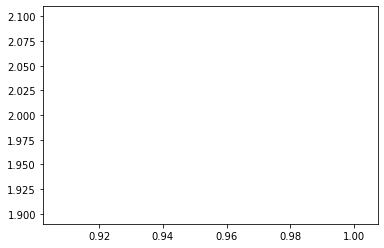

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(scorecard_array.sum() / scorecard_array.size, epochs, color="red")